In [24]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [25]:
data = pd.read_csv('Training_Scores.csv')
df = pd.DataFrame(data)      

In [26]:
df.head()

,Total sentences,Total words,Total Syllable,Gunning Fog Index,Flesch Reading Ease,Flesch-Kincaid Grade,classification
0,1322,5850,NaN,9.76,59.85,6.01,0
1,1239,5499,NaN,8.63,66.35,5.11,0
2,1267,4155,NaN,10.24,54.20,6.51,0
3,1793,6392,NaN,9.47,56.05,6.33,0
4,1395,4555,NaN,9.39,55.94,6.27,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total sentences       64 non-null     int64  
 1   Total words           64 non-null     int64  
 2   Total Syllable        0 non-null      float64
 3   Gunning Fog Index     64 non-null     float64
 4   Flesch Reading Ease   64 non-null     float64
 5   Flesch-Kincaid Grade  64 non-null     float64
 6   classification        64 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 3.6 KB


In [28]:
df.describe() 

,Total sentences,Total words,Total Syllable,Gunning Fog Index,Flesch Reading Ease,Flesch-Kincaid Grade,classification
count,64.000000,64.000000,0.0,64.000000,64.000000,64.000000,64.000000
mean,1506.484375,5076.531250,NaN,10.292344,54.915781,6.437344,0.781250
std,859.836271,2878.572452,NaN,1.026515,6.514286,0.905120,0.416667
min,524.000000,1366.000000,NaN,7.450000,42.520000,3.390000,0.000000
25%,1105.000000,3517.500000,NaN,9.707500,50.922500,6.065000,1.000000
50%,1296.000000,4342.500000,NaN,10.445000,53.580000,6.590000,1.000000
75%,1539.000000,5600.250000,NaN,10.955000,57.675000,6.930000,1.000000
max,6300.000000,21719.000000,NaN,12.410000,74.630000,8.200000,1.000000


In [29]:
x = df.drop(columns=(["Total sentences", "Total words", "Total Syllable", "classification"]), axis = 1)
y = df["classification"]

In [30]:
number_advance = len(data[y == 1])
number_beginner = len(data[y == 0])
print("advanced:" +str(number_advance), "beginner:" + str(number_beginner))

advanced:50 beginner:14


In [31]:
df_corr = df.corr() 

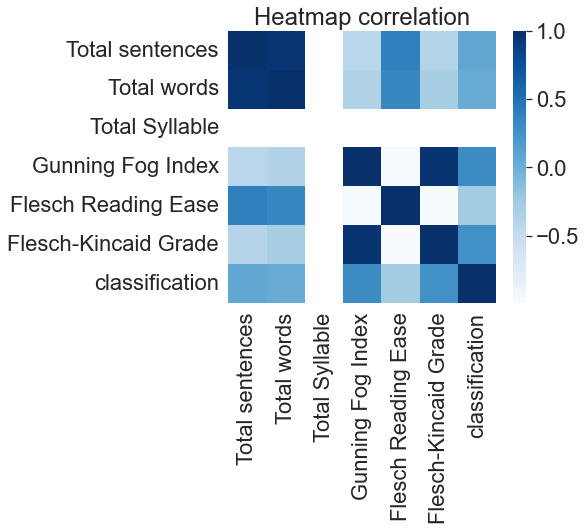

In [32]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [33]:
df_train_all = df[0:150000] # dividing the dataset into two parts
df_train_1 = df_train_all[df_train_all['classification'] == 1] # advanced
df_train_0 = df_train_all[df_train_all['classification'] == 0] # beginner
print('In this dataset, we have {} advanced so we need to take a similar number of beginner'.format(len(df_train_1)))

df_sample=df_train_0.sample(14) # beginner
df_train = df_train_1.append(df_sample) # We gather the advanced with the beginner
df_train = df_train.sample(frac=1) # Then we mix our dataset


In this dataset, we have 50 advanced so we need to take a similar number of beginner


C:\Users\suhas\AppData\Local\Temp\ipykernel_20244\3811818242.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample) # We gather the advanced with the beginner


In [34]:
X_train = df_train.drop(["Total sentences", "Total words", "Total Syllable", "classification"],axis=1) # We drop the features which are useless like Time ,the labels 
y_train = df_train["classification"] # Creating a target class
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [35]:
#with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(["classification"],axis=1)
y_test_all = df_test_all['classification']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [36]:
class_names=np.array(['0','1']) # Binary label

In [37]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
classifier = svm.SVC(kernel='linear') 

In [39]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
prediction_SVM = classifier.predict(X_train)

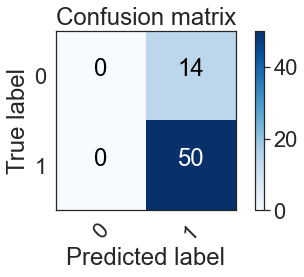

In [41]:
cm = confusion_matrix(y_train, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [43]:
print('We have detected {} advanced / {} total.'.format(str(cm[1][1]),str(cm[1][1]+cm[1][0])))
print('\nSo, the probability to detect an advanced is {}'.format(str(cm[1][1]/(cm[1][1]+cm[1][0]))))
print("the accuracy is : {}".format(str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])))))

We have detected 50 advanced / 50 total.

So, the probability to detect an advanced is 1.0
the accuracy is : 0.78125


In [44]:
classifier = svm.SVC(kernel='linear') 

In [45]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
prediction_SVM_all = classifier.predict(X_test_all)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by SVC.